# DATA ANALYSIS - CLUSTER EXAMINATION

`Author: José Luis Maldonado Álvarez`

## K-MEANS

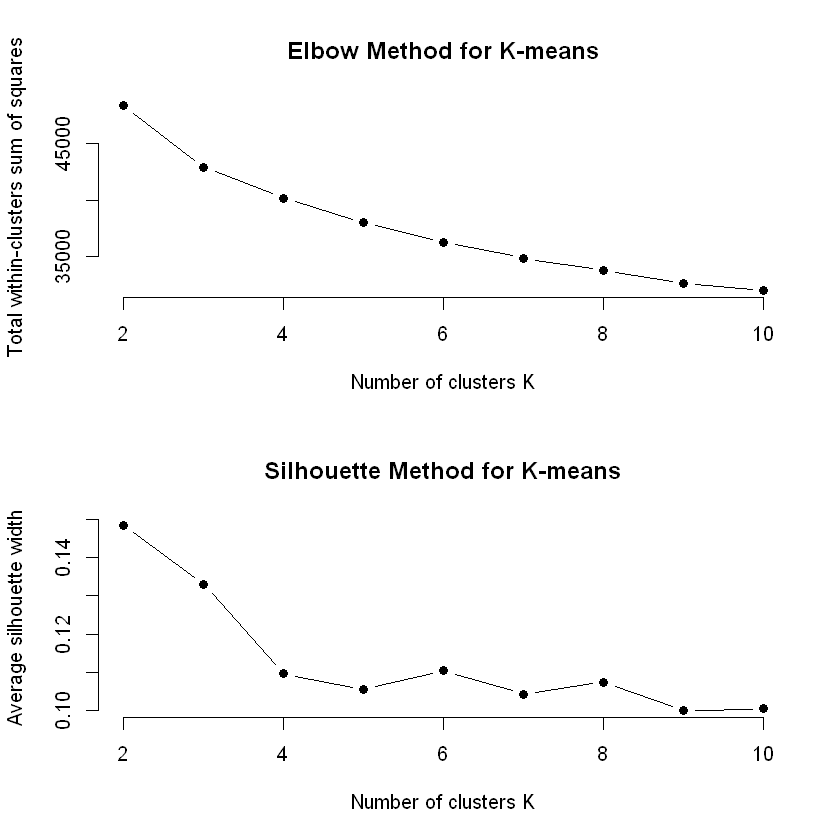

In [1]:
suppressPackageStartupMessages(library(cluster))
suppressPackageStartupMessages(library(dplyr))

# Load data and select only variables that start with 'SE_'
df <- read.csv('FINAL_DATASET.csv')
se_vars <- df %>%
    select(starts_with("SE_")) %>%
    mutate(across(everything(), as.factor)) %>%
    select(-c(SE_GCHI, SE_CHI, SE_LA, SE_SN, SE_PC, SE_MP, SE_WT, SE_PUBT, SE_PI, SE_PRIT))
    

# Determine the optimal number of clusters for k-means using the elbow and silhouette methods
set.seed(123)

# Compute the dissimilarity matrix using daisy (suitable for factors)
diss <- daisy(se_vars, metric = "gower")
diss_matrix <- as.matrix(diss)

wss <- numeric()
sil_width <- numeric()
max_k <- 10

for (k in 2:max_k) {
    kmeans_res <- kmeans(diss_matrix, centers = k, nstart = 10)
    wss[k] <- kmeans_res$tot.withinss
    cluster_assign <- kmeans_res$cluster
    sil <- silhouette(cluster_assign, dist = diss_matrix)
    sil_width[k] <- mean(sil[, 3])
}

# Plot the elbow method (within-cluster sum of squares)
par(bg= "white", mfrow = c(2, 1))
plot(2:max_k, wss[2:max_k], type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K", ylab = "Total within-clusters sum of squares",
     main = "Elbow Method for K-means")

# Plot the average silhouette width
plot(2:max_k, sil_width[2:max_k], type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K", ylab = "Average silhouette width",
     main = "Silhouette Method for K-means")


Variable: SE_MS 
   
      1   2   3
  1 274 599 616
  2 255 189 176

Variable: SE_SUP 
   
      1   2   3
  0  32  16   7
  1 497 772 785

Variable: SE_RES 
   
      1   2   3
  1 343 336 524
  2 186 452 268

Variable: SE_STU 
   
      1   2   3
  1 409 120 680
  2 120 668 112

Variable: SE_OCC 
   
      1   2   3
  1 396 358 743
  2 133 430  49

Variable: SE_EX 
   
      1   2   3
  0 344 295 110
  1 185 493 682

Variable: SE_HW 
   
      1   2   3
  0 293 446 429
  1 236 342 363

Variable: SE_PET 
   
      1   2   3
  0 263 468 588
  1 266 320 204

Variable: SE_INT 
   
      1   2   3
  0 236  16 228
  1 293 772 564

Variable: SE_TSI 
   
      1   2   3
  0 321 700 685
  1 208  88 107

Variable: SE_ACTT 
   
      1   2   3
  0 280 281  83
  1 249 507 709

Variable: SE_SH 
   
      1   2   3
  0  36   3   1
  1 493 785 791

Variable: SE_TEH 
   
      1   2   3
  0  47  25   5
  1 482 763 787

Variable: SE_CCH 
   
      1   2   3
  0 279  49 154
  1 250 739 638

Variable

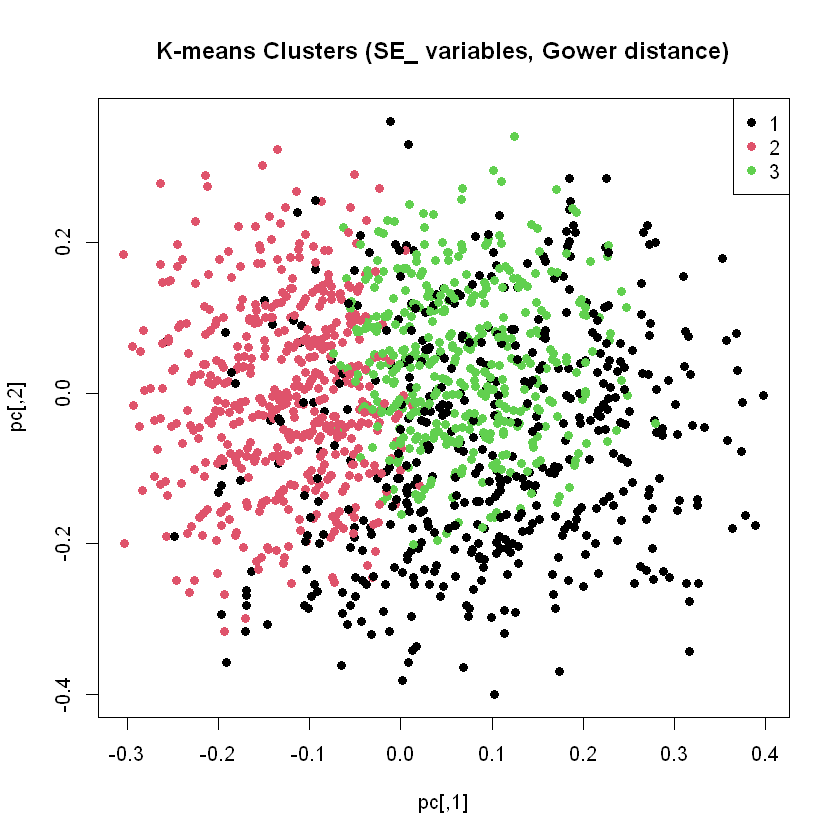

In [2]:
# Chosen number of clusters k = 3
set.seed(123)
k <- 3
kmeans_result <- kmeans(as.matrix(diss), centers = k)

# Add cluster assignment to the data
se_vars$cluster <- as.factor(kmeans_result$cluster)

# Visualize clusters using first two principal coordinates
pc <- cmdscale(diss, k = 2)
par(bg = "white")
plot(pc, col = se_vars$cluster, pch = 19, main = "K-means Clusters (SE_ variables, Gower distance)")
legend("topright", legend = levels(se_vars$cluster), col = 1:k, pch = 19)

# # Analyze the characteristics of each cluster
# cluster_summary <- se_vars %>%
#     group_by(cluster) %>%
#     summarise(across(where(is.factor), ~paste0(names(sort(table(.), decreasing = TRUE)[1]), " (", max(table(.)), ")"), .names = "mode_{.col}"),
#               count = n())
# print(cluster_summary)

# Show the distribution of each SE_ variable by cluster
for (var in names(se_vars)[names(se_vars) != "cluster"]) {
    cat("\nVariable:", var, "\n")
    print(table(se_vars[[var]], se_vars$cluster))
}

In [3]:
# Print the distribution of OUT_MACE variable for each cluster from kmeans_result
mace_by_cluster <- table(df$OUT_MACE, se_vars$cluster)
print(mace_by_cluster)

   
      1   2   3
  0 412 657 632
  1 117 131 160


Warning message:
"package 'fmsb' was built under R version 4.4.3"
Warning message:
"Setting row names on a tibble is deprecated."


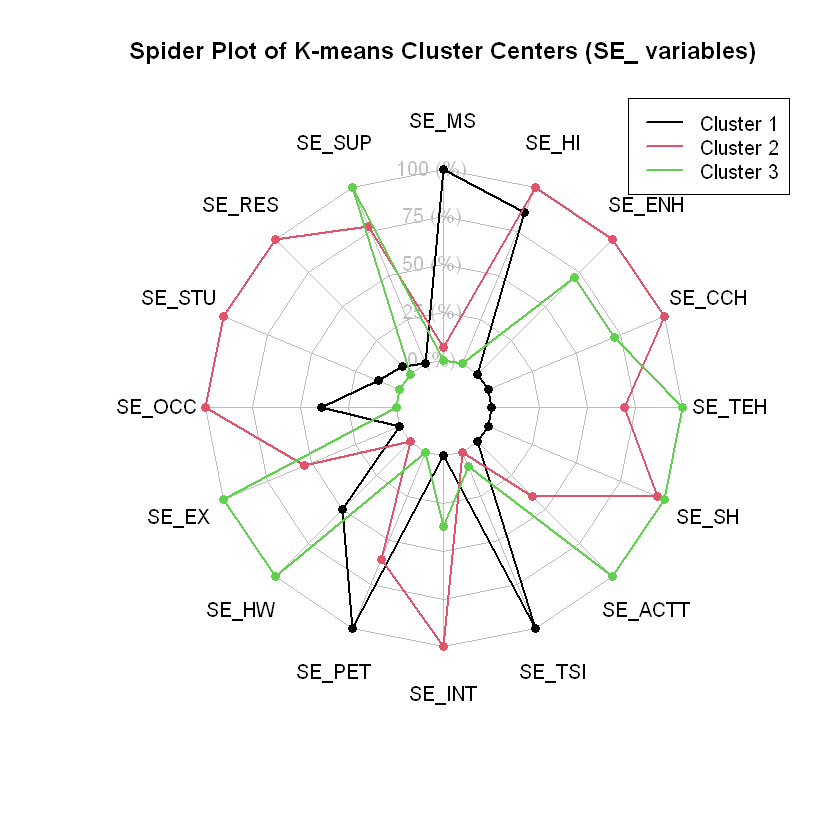

In [4]:
# Spider (radar) plot of cluster centers from kmeans_result

suppressPackageStartupMessages(library(fmsb))

# Extract cluster centers (on dissimilarity matrix, so not interpretable per variable)
# Instead, compute mode for each SE_ variable per cluster for visualization

# Prepare data: convert factors to numeric for radar plot
se_numeric <- df %>%
    select(starts_with("SE_")) %>%
    mutate(across(everything(), ~as.numeric(as.factor(.)))) %>%
    select(-c(SE_GCHI, SE_CHI, SE_LA, SE_SN, SE_PC, SE_MP, SE_WT, SE_PUBT, SE_PI, SE_PRIT))

cluster_centers <- se_numeric %>%
    mutate(cluster = kmeans_result$cluster) %>%
    group_by(cluster) %>%
    summarise(across(everything(), mean))

# fmsb requires max/min rows
max_vals <- apply(cluster_centers[,-1], 2, max)
min_vals <- apply(cluster_centers[,-1], 2, min)
radar_data <- rbind(max_vals, min_vals, cluster_centers[,-1])

# Set row names for clarity
rownames(radar_data) <- c("Max", "Min", paste0("Cluster_", cluster_centers$cluster))

# Plot
par(bg = "white")
radarchart(radar_data, axistype = 1,
           title = "Spider Plot of K-means Cluster Centers (SE_ variables)",
           pcol = 1:k, plwd = 2, plty = 1, cglcol = "grey", cglty = 1, axislabcol = "grey")
legend("topright", legend = paste0("Cluster ", cluster_centers$cluster), col = 1:k, lty = 1, lwd = 2)

## PAM ()


Variable: SE_MS 
   
      1   2   3
  1 397 368 724
  2 123 240 257

Variable: SE_SUP 
   
      1   2   3
  0   6  21  28
  1 514 587 953

Variable: SE_RES 
   
      1   2   3
  1 391 516 296
  2 129  92 685

Variable: SE_STU 
   
      1   2   3
  1 379 510 320
  2 141  98 661

Variable: SE_OCC 
   
      1   2   3
  1 331 494 672
  2 189 114 309

Variable: SE_EX 
   
      1   2   3
  0 372 132 245
  1 148 476 736

Variable: SE_HW 
   
      1   2   3
  0 413 130 625
  1 107 478 356

Variable: SE_PET 
   
      1   2   3
  0 156 432 731
  1 364 176 250

Variable: SE_INT 
   
      1   2   3
  0 121 191 168
  1 399 417 813

Variable: SE_TSI 
   
      1   2   3
  0 396 487 823
  1 124 121 158

Variable: SE_ACTT 
   
      1   2   3
  0 344  74 226
  1 176 534 755

Variable: SE_SH 
   
      1   2   3
  0  16  10  14
  1 504 598 967

Variable: SE_TEH 
   
      1   2   3
  0  24  15  38
  1 496 593 943

Variable: SE_CCH 
   
      1   2   3
  0 180 134 168
  1 340 474 813

Variable

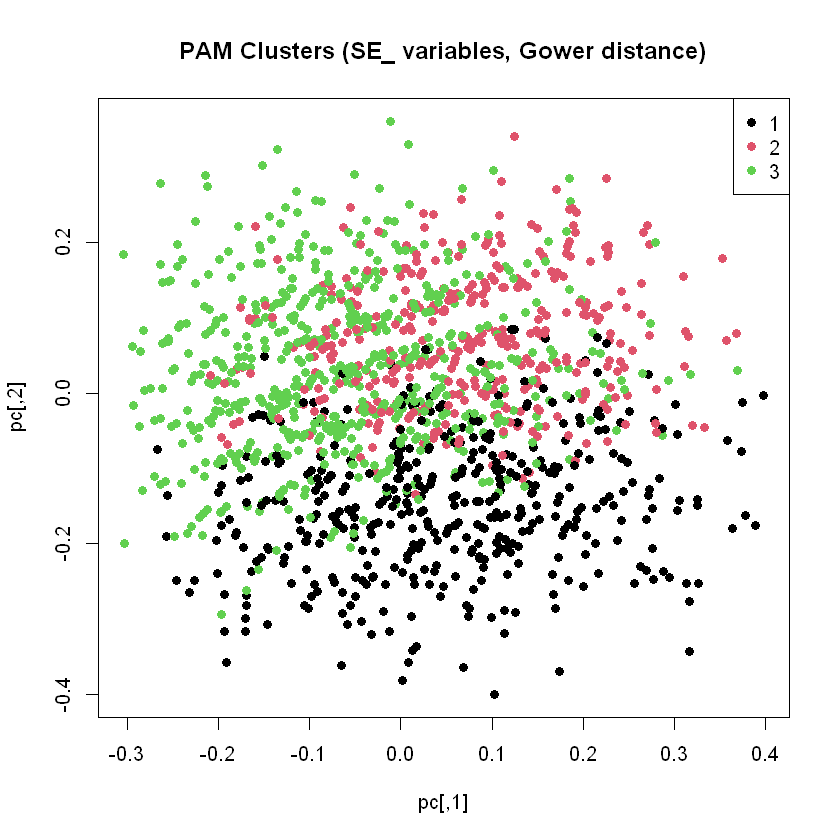

In [5]:
# PAM (Partitioning Around Medoids) clustering using Gower distance

# Remove any cluster columns if present
se_vars_pam <- se_vars %>%
    select(-matches("^cluster"))

# Compute the dissimilarity matrix using daisy (already done above)
# diss <- daisy(se_vars, metric = "gower")

set.seed(123)
k <- 3
pam_result <- pam(diss, k)

# Add cluster assignment to the data
se_vars$cluster_pam <- as.factor(pam_result$clustering)

# Visualize clusters using first two principal coordinates
pc <- cmdscale(diss, k = 2)
par(bg = "white")
plot(pc, col = se_vars$cluster_pam, pch = 19, main = "PAM Clusters (SE_ variables, Gower distance)")
legend("topright", legend = levels(se_vars$cluster_pam), col = 1:k, pch = 19)

# # Analyze the characteristics of each cluster
# cluster_summary_pam <- se_vars %>%
#     group_by(cluster_pam) %>%
#     summarise(across(where(is.factor), ~paste0(names(sort(table(.), decreasing = TRUE)[1]), " (", max(table(.)), ")"), .names = "mode_{.col}"),
#               count = n())

# print(cluster_summary_pam)

# Show the distribution of each SE_ variable by cluster
for (var in names(se_vars)[names(se_vars) != "cluster_pam"]) {
    cat("\nVariable:", var, "\n")
    print(table(se_vars[[var]], se_vars$cluster_pam))
}

Warning message:
"Setting row names on a tibble is deprecated."


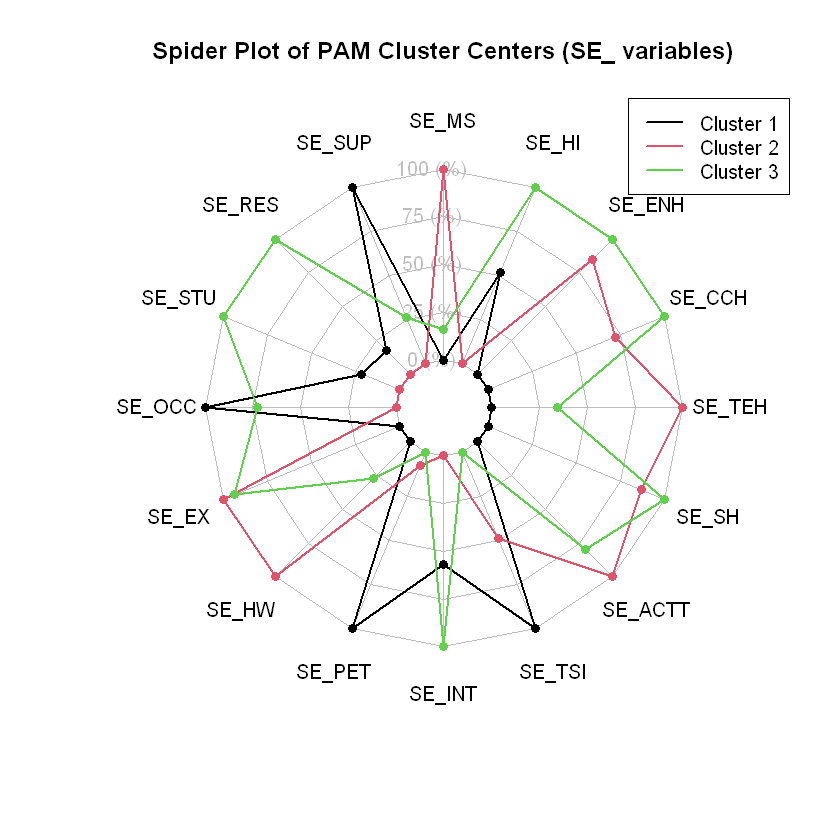

In [6]:
# Spider (radar) plot of cluster centers from pam_result

# Prepare data: convert factors to numeric for radar plot
se_numeric_pam <- se_vars %>%
    select(-cluster, -cluster_pam) %>%
    mutate(across(everything(), ~as.numeric(as.factor(.))))

cluster_centers_pam <- se_numeric_pam %>%
    mutate(cluster_pam = pam_result$clustering) %>%
    group_by(cluster_pam) %>%
    summarise(across(everything(), mean))

# fmsb requires max/min rows
max_vals_pam <- apply(cluster_centers_pam[,-1], 2, max)
min_vals_pam <- apply(cluster_centers_pam[,-1], 2, min)
radar_data_pam <- rbind(max_vals_pam, min_vals_pam, cluster_centers_pam[,-1])

# Set row names for clarity
rownames(radar_data_pam) <- c("Max", "Min", paste0("Cluster_", cluster_centers_pam$cluster_pam))

# Plot
par(bg = "white")
radarchart(radar_data_pam, axistype = 1,
           title = "Spider Plot of PAM Cluster Centers (SE_ variables)",
           pcol = 1:k, plwd = 2, plty = 1, cglcol = "grey", cglty = 1, axislabcol = "grey")
legend("topright", legend = paste0("Cluster ", cluster_centers_pam$cluster_pam), col = 1:k, lty = 1, lwd = 2)

In [7]:
# Print the distribution of OUT_MACE variable for each cluster from pam_result
mace_by_pam_cluster <- table(df$OUT_MACE, se_vars$cluster_pam)
print(mace_by_pam_cluster)

   
      1   2   3
  0 415 492 794
  1 105 116 187


## 3. Hierarchical clustering


Variable: SE_MS 
   
      1   2   3
  1 892 158 439
  2 114 396 110

Variable: SE_SUP 
   
      1   2   3
  0   7  35  13
  1 999 519 536

Variable: SE_RES 
   
      1   2   3
  1 779 347  77
  2 227 207 472

Variable: SE_STU 
   
      1   2   3
  1 686 388 135
  2 320 166 414

Variable: SE_OCC 
   
      1   2   3
  1 690 411 396
  2 316 143 153

Variable: SE_EX 
   
      1   2   3
  0 410 195 144
  1 596 359 405

Variable: SE_HW 
   
      1   2   3
  0 749 135 284
  1 257 419 265

Variable: SE_PET 
   
      1   2   3
  0 429 447 443
  1 577 107 106

Variable: SE_INT 
   
      1   2   3
  0 190 247  43
  1 816 307 506

Variable: SE_TSI 
   
      1   2   3
  0 811 429 466
  1 195 125  83

Variable: SE_ACTT 
   
      1   2   3
  0 393  94 157
  1 613 460 392

Variable: SE_SH 
   
      1   2   3
  0  19  17   4
  1 987 537 545

Variable: SE_TEH 
   
      1   2   3
  0  46  18  13
  1 960 536 536

Variable: SE_CCH 
   
      1   2   3
  0 327 109  46
  1 679 445 503

Variable

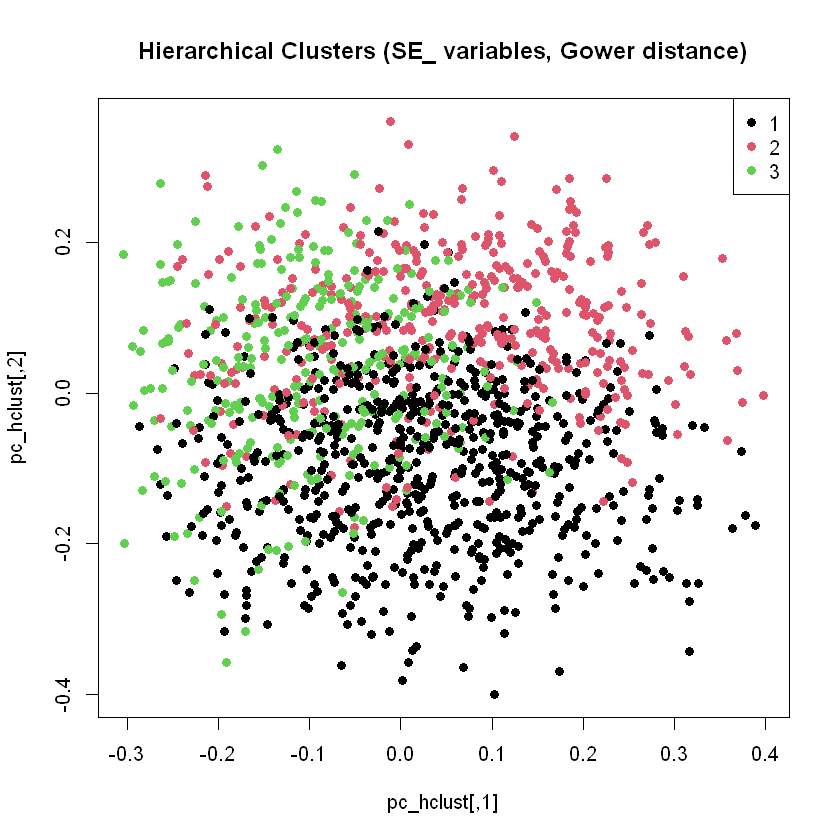

In [8]:
# Hierarchical clustering using hclust on Gower distance

# Select only the variables that start with 'SE_'
se_vars_hclust <- df %>% select(starts_with("SE_")) %>%
    mutate(across(everything(), as.factor)) %>%
    select(-c(SE_GCHI, SE_CHI, SE_LA, SE_SN, SE_PC, SE_MP, SE_WT, SE_PUBT, SE_PI, SE_PRIT))

# Compute the dissimilarity matrix using daisy (suitable for factors)
diss_hclust <- daisy(se_vars_hclust, metric = "gower")

# Perform hierarchical clustering
hc <- hclust(as.dist(diss_hclust), method = "ward.D2")

# Choose number of clusters (e.g., 3, can be adjusted)
k <- 3
clusters_hclust <- cutree(hc, k = k)

# Add cluster assignment to the data
se_vars_hclust$cluster_hclust <- as.factor(clusters_hclust)

# Visualize clusters using first two principal coordinates
pc_hclust <- cmdscale(diss_hclust, k = 2)
par(bg = "white")
plot(pc_hclust, col = se_vars_hclust$cluster_hclust, pch = 19, main = "Hierarchical Clusters (SE_ variables, Gower distance)")
legend("topright", legend = levels(se_vars_hclust$cluster_hclust), col = 1:k, pch = 19)

# # Analyze the characteristics of each cluster
# cluster_summary_hclust <- se_vars_hclust %>%
#     group_by(cluster_hclust) %>%
#     summarise(across(where(is.factor), ~paste0(names(sort(table(.), decreasing = TRUE)[1]), " (", max(table(.)), ")"), .names = "mode_{.col}"),
#               count = n())

# print(cluster_summary_hclust)

# Show the distribution of each SE_ variable by cluster
for (var in names(se_vars_hclust)[names(se_vars_hclust) != "cluster_hclust"]) {
    cat("\nVariable:", var, "\n")
    print(table(se_vars_hclust[[var]], se_vars_hclust$cluster_hclust))
}

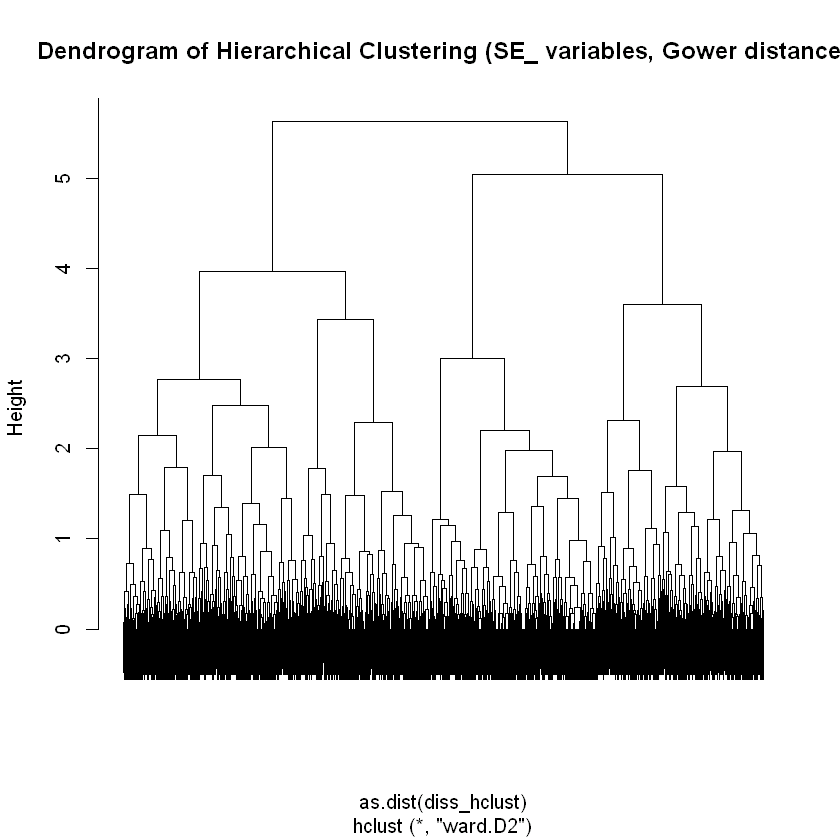

In [9]:
plot(hc, labels = FALSE, main = "Dendrogram of Hierarchical Clustering (SE_ variables, Gower distance)")

Warning message:
"Setting row names on a tibble is deprecated."


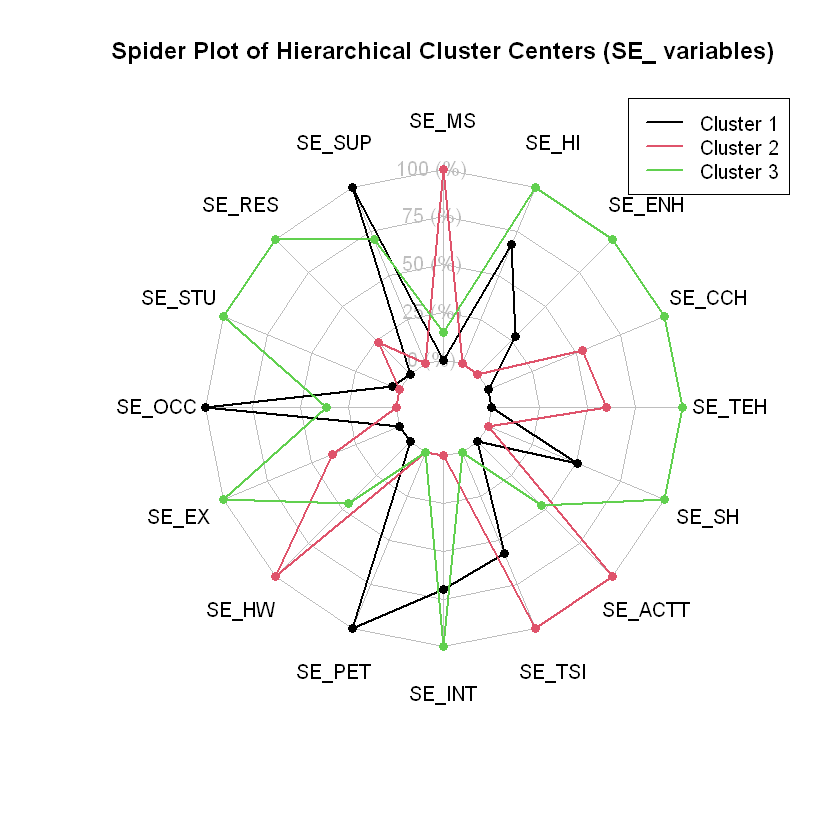

In [10]:
# Spider (radar) plot of cluster centers from hierarchical clustering

# Prepare data: convert factors to numeric for radar plot
se_numeric_hclust <- se_vars_hclust %>%
    select(-cluster_hclust) %>%
    mutate(across(everything(), ~as.numeric(as.factor(.))))

cluster_centers_hclust <- se_numeric_hclust %>%
    mutate(cluster_hclust = clusters_hclust) %>%
    group_by(cluster_hclust) %>%
    summarise(across(everything(), mean))

# fmsb requires max/min rows
max_vals_hclust <- apply(cluster_centers_hclust[,-1], 2, max)
min_vals_hclust <- apply(cluster_centers_hclust[,-1], 2, min)
radar_data_hclust <- rbind(max_vals_hclust, min_vals_hclust, cluster_centers_hclust[,-1])

# Set row names for clarity
rownames(radar_data_hclust) <- c("Max", "Min", paste0("Cluster_", cluster_centers_hclust$cluster_hclust))

# Plot
par(bg = "white")
radarchart(radar_data_hclust, axistype = 1,
           title = "Spider Plot of Hierarchical Cluster Centers (SE_ variables)",
           pcol = 1:k, plwd = 2, plty = 1, cglcol = "grey", cglty = 1, axislabcol = "grey")
legend("topright", legend = paste0("Cluster ", cluster_centers_hclust$cluster_hclust), col = 1:k, lty = 1, lwd = 2)

In [11]:
# Print the distribution of OUT_MACE variable for each cluster from hierarchical clustering
mace_by_hclust_cluster <- table(df$OUT_MACE, se_vars_hclust$cluster_hclust)
print(mace_by_hclust_cluster)
# Calculate and print percentage of OUT_MACE == 1 for each cluster
percent_mace1 <- prop.table(mace_by_hclust_cluster, 2)["1", ] * 100
print(round(percent_mace1, 2))

   
      1   2   3
  0 814 431 456
  1 192 123  93
    1     2     3 
19.09 22.20 16.94 


## 4. KModes

Warning message:
"package 'klaR' was built under R version 4.4.2"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elementos para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message in withindiff_vec[k] <- km_res$withindiff:
"número de elemen

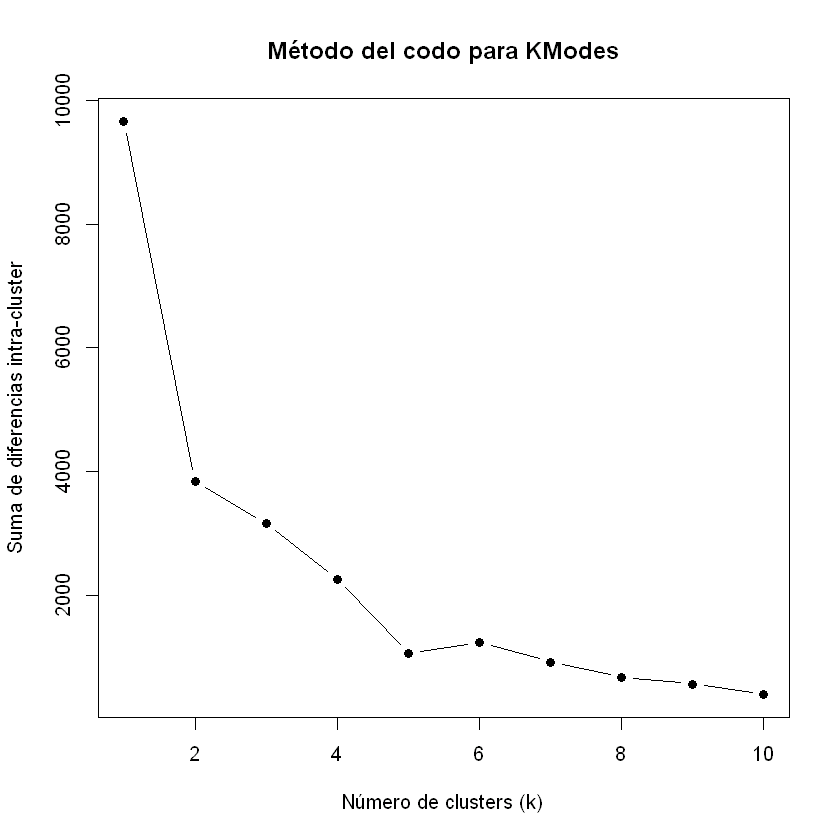

In [12]:
# KModes clustering for categorical data

# Prepare data: se_vars already contains only factor variables (excluding cluster assignments)
# Remove any cluster columns if present
se_vars_kmodes <- se_vars %>%
    select(-matches("^cluster"))

suppressPackageStartupMessages(library(klaR))

set.seed(123)
max_k <- 10
withindiff_vec <- numeric(max_k)

for (k in 1:max_k) {
    km_res <- suppressWarnings(kmodes(se_vars_kmodes, modes = k, iter.max = 20))
    withindiff_vec[k] <- km_res$withindiff
}

plot(1:max_k, withindiff_vec, type = "b", pch = 19,
     xlab = "Número de clusters (k)", ylab = "Suma de diferencias intra-cluster",
     main = "Método del codo para KModes")




Variable: SE_MS 
   
      1   2   3
  1 614 348 527
  2 187 144 289

Variable: SE_SUP 
   
      1   2   3
  0  21  11  23
  1 780 481 793

Variable: SE_RES 
   
      1   2   3
  1 315 192 696
  2 486 300 120

Variable: SE_STU 
   
      1   2   3
  1 121 456 632
  2 680  36 184

Variable: SE_OCC 
   
      1   2   3
  1 462 425 610
  2 339  67 206

Variable: SE_EX 
   
      1   2   3
  0 272 187 290
  1 529 305 526

Variable: SE_HW 
   
      1   2   3
  0 526 351 291
  1 275 141 525

Variable: SE_PET 
   
      1   2   3
  0 505 331 483
  1 296 161 333

Variable: SE_INT 
   
      1   2   3
  0  24 286 170
  1 777 206 646

Variable: SE_TSI 
   
      1   2   3
  0 679 389 638
  1 122 103 178

Variable: SE_ACTT 
   
      1   2   3
  0 253 151 240
  1 548 341 576

Variable: SE_SH 
   
      1   2   3
  0  10  10  20
  1 791 482 796

Variable: SE_TEH 
   
      1   2   3
  0  30  15  32
  1 771 477 784

Variable: SE_CCH 
   
      1   2   3
  0 106 151 225
  1 695 341 591

Variable

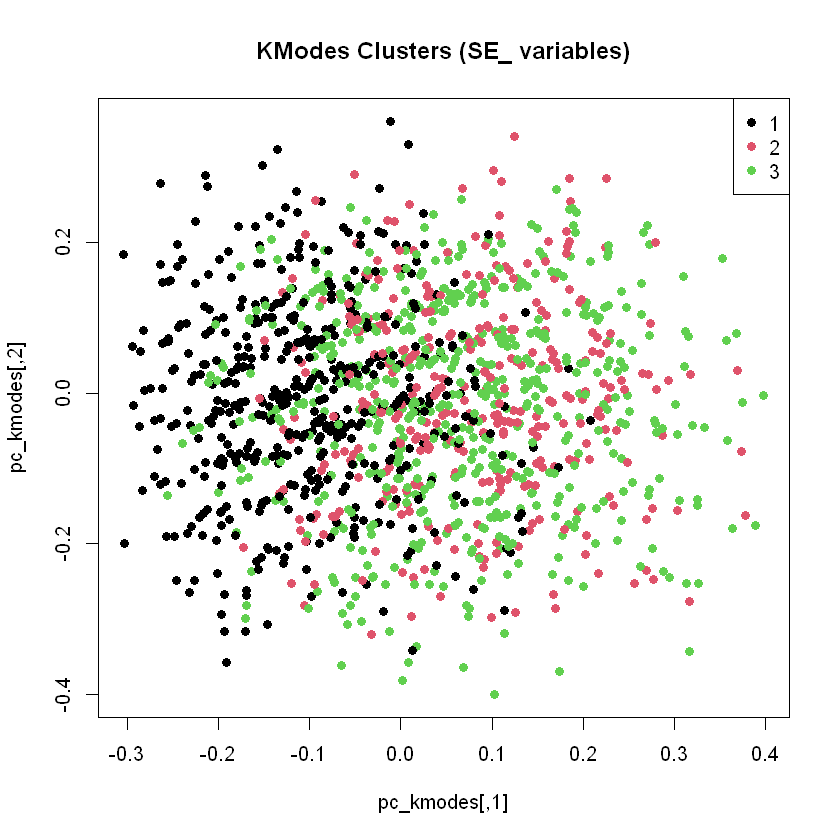

In [13]:
set.seed(123)
k <- 3
kmodes_result <- kmodes(se_vars_kmodes, modes = k, iter.max = 20)

# Add cluster assignment to the data
se_vars$cluster_kmodes <- as.factor(kmodes_result$cluster)

# Visualize clusters using first two principal coordinates
pc_kmodes <- cmdscale(diss, k = 2)
par(bg = "white")
plot(pc_kmodes, col = se_vars$cluster_kmodes, pch = 19, main = "KModes Clusters (SE_ variables)")
legend("topright", legend = levels(se_vars$cluster_kmodes), col = 1:k, pch = 19)

# # Analyze the characteristics of each cluster
# cluster_summary_kmodes <- se_vars %>%
#     group_by(cluster_kmodes) %>%
#     summarise(across(where(is.factor), ~paste0(names(sort(table(.), decreasing = TRUE)[1]), " (", max(table(.)), ")"), .names = "mode_{.col}"),
#               count = n())
# print(cluster_summary_kmodes)

# Show the distribution of each SE_ variable by cluster
for (var in names(se_vars)[names(se_vars) != "cluster_kmodes"]) {
    cat("\nVariable:", var, "\n")
    print(table(se_vars[[var]], se_vars$cluster_kmodes))
}

# Print the distribution of OUT_MACE variable for each KModes cluster
mace_by_kmodes_cluster <- table(df$OUT_MACE, se_vars$cluster_kmodes)
print(mace_by_kmodes_cluster)

## 5. KULLBAK LEIBLER

In [15]:
# # Kullback-Leibler (KL) divergence is not a true distance metric and is not directly applicable to categorical/factor data as Gower is.

# # One-hot encode SE_ variables
# suppressPackageStartupMessages(library(caret))
# se_vars <- df %>% select(starts_with("SE_"))
# dummies <- dummyVars(" ~ .", data = se_vars)
# se_onehot <- as.data.frame(predict(dummies, newdata = se_vars))

# # Add a small value to avoid log(0)
# epsilon <- 1e-8
# se_onehot <- se_onehot + epsilon
# se_onehot <- se_onehot / rowSums(se_onehot) # Normalize to sum to 1

# # Function to compute KL divergence between two probability vectors
# kl_divergence <- function(p, q) {
#     sum(p * log(p / q))
# }

# # Compute pairwise KL divergence matrix
# n <- nrow(se_onehot)
# kl_matrix <- matrix(0, n, n)
# for (i in 1:n) {
#     for (j in 1:n) {
#         kl_matrix[i, j] <- kl_divergence(as.numeric(se_onehot[i, ]), as.numeric(se_onehot[j, ]))
#     }
# }

# # Perform clustering (e.g., k-medoids) using the KL divergence matrix
# set.seed(123)
# k <- 3
# pam_result <- pam(as.dist(kl_matrix), k)

# # Add cluster assignment to the data
# se_vars$cluster_kl <- as.factor(pam_result$clustering)

# # Visualize clusters using first two principal coordinates
# pc_kl <- cmdscale(as.dist(kl_matrix), k = 2)
# par(bg = "white")
# plot(pc_kl, col = se_vars$cluster_kl, pch = 19, main = "PAM Clusters (SE_ variables, KL divergence)")
# legend("topright", legend = levels(se_vars$cluster_kl), col = 1:k, pch = 19)

# # Analyze the characteristics of each cluster
# cluster_summary_kl <- se_vars %>%
#     group_by(cluster_kl) %>%
#     summarise(across(where(is.factor), ~paste0(names(sort(table(.), decreasing = TRUE)[1]), " (", max(table(.)), ")"), .names = "mode_{.col}"),
#               count = n())

# print(cluster_summary_kl)

# # Show the distribution of each SE_ variable by cluster
# for (var in names(se_vars)[names(se_vars) != "cluster_kl"]) {
#     cat("\nVariable:", var, "\n")
#     print(table(se_vars[[var]], se_vars$cluster_kl))
# }